In [39]:
import warnings
warnings.filterwarnings ('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv(r'C:\Users\HARSHIT\Downloads\msd analysis\ABDBOOBOOM.csv')

# Head to Head Battle - Slinga Malinga vs Mr. 360

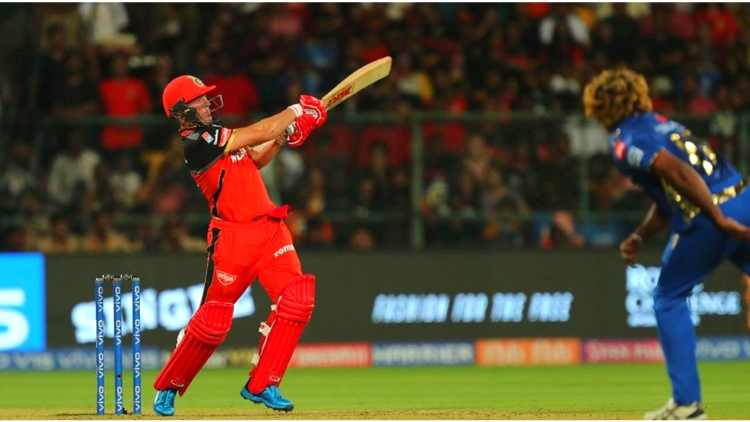

In [3]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.innings.unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [5]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [6]:
df.innings.unique()

array([1, 2], dtype=int64)

In [18]:
malinga = df[df.bowler == 'SL Malinga']

In [19]:
malinga.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
13561,392181,2009,2009-04-18,Newlands,2,19.7,Chennai Super Kings,Mumbai Indians,T Thushara,Joginder Sharma,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
abd_m = malinga[malinga.striker == 'AB de Villiers'] #Taking all data where AB = batsman and Malinga = bowler

In [114]:
abd_m.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
21045,392215,2009,2009-05-08,Buffalo Park,2,17.0,Delhi Daredevils,Mumbai Indians,AB de Villiers,TM Dilshan,SL Malinga,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
abd_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 21045 to 172264
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                64 non-null     int64  
 1   season                  64 non-null     int64  
 2   start_date              64 non-null     object 
 3   venue                   64 non-null     object 
 4   innings                 64 non-null     int64  
 5   ball                    64 non-null     float64
 6   batting_team            64 non-null     object 
 7   bowling_team            64 non-null     object 
 8   striker                 64 non-null     object 
 9   non_striker             64 non-null     object 
 10  bowler                  64 non-null     object 
 11  runs_off_bat            64 non-null     int64  
 12  extras                  64 non-null     int64  
 13  wides                   3 non-null      float64
 14  noballs                 0 non-null  

In [72]:
convert_dict = {'ball' : float }
abd_m = abd_m.astype(convert_dict) #Converting Ball values into float

## No. of innings both have played against each other

In [113]:
len(abd_m['match_id'].unique())

11

## No. of balls Malinga has bowled to ABD

In [29]:
Abd_bf = len(abd_m) 
Abd_bf

64

## No. of Runs ABD scored against Malinga

In [30]:
Abd_rs = sum(abd_m['runs_off_bat'])
Abd_rs

124

## ABD over all Strike Rate against Malinga

In [31]:
AbdSR = Abd_rs/Abd_bf*100
AbdSR

193.75

### ABD Strike Rate v Malinga in Powerplay (0.0 to 6.0 overs)

In [99]:
AbdPPR = sum(abd_m[(abd_m.ball > 0.0) & (abd_m.ball <= 6.0)]['runs_off_bat'])
MBBPP = len(abd_m[(abd_m.ball > 0.0) & (abd_m.ball <= 6.0)])
PPSR = AbdPPR/MBBPP*100
PPSR

100.0

### ABD Strike Rate v Malinga in Middle Overs (6.0 to 16.0 overs)

In [100]:
AbdMOR = sum(abd_m[(abd_m.ball > 6.0) & (abd_m.ball <= 16.0)]['runs_off_bat'])
MBMOP = len(abd_m[(abd_m.ball > 6.0) & (abd_m.ball <= 16.0)])
MOSR = AbdMOR/MBMOP*100
MOSR

235.48387096774195

### ABD Strike Rate v Malinga in Death Overs (16.0 to 20.0 overs)

In [101]:
AbdDOR = sum(abd_m[(abd_m.ball > 16.0) & (abd_m.ball <= 20.0)]['runs_off_bat'])
MBDOP = len(abd_m[(abd_m.ball > 16.0) & (abd_m.ball <= 20.0)])
DOSR = AbdDOR/MBDOP*100
DOSR

181.8181818181818

## Boundaries scored by ABD against Malinga

In [102]:
len(abd_m[(abd_m.runs_off_bat == 4)])

10

## Sixes hit by ABD against Malinga

In [103]:
len(abd_m[(abd_m.runs_off_bat == 6)])

8

## No. of times Malinga has dismissed ABD

In [32]:
len(abd_m[abd_m.player_dismissed == 'AB de Villiers'])

1

###### We can say, Malinga has kept ABD quite in the Powerplay but ABD has got better of his counterpart in the middle overs by striking it at more than 2 runs per ball. The death overs are a little better for the bowler than the middle ones but still ABD has an edge over Malinga as he has got out ABD out only once in 11 innings.